# Analysis of interaction frequency and distance

In this notebook, the distributions of read pair numbers per interaction and interaction distances are investigated.

## Setting up the notebook

In [1]:
import sys
import os
sys.path.append("..")
from diachr import DiachromaticInteractionSet
from diachr import IaFreqDistAnalysis

## Input file

We have prepared a small test file in ``Diachromatic11`` format that only contains interactions on chromosome ``chr21`` and ``chr22``.

In [2]:
# Interactions on 'chr21' and 'chr22' only
INTERACTION_FILE = "../tests/data/baited_digests_d11_interaction_test_file.tsv.gz"
RPC_RULE = "st"
OUT_PREFIX = "TEST_FILE_" + RPC_RULE

INTERACTION_FILE = "../tests/data/baited_digests_d11_interaction_test_file_2.tsv.gz"
RPC_RULE = "st"
OUT_PREFIX = "TEST_FILE_2_" + RPC_RULE

## Load interactions for analysis

First, we read an interaction file into a `DiachromaticInteractionSet`. Then we pass the `DiachromaticInteractionSet` to an object of class `IaFreqDistAnalysis`. The function `IaFreqDistAnalysis.ingest_interaction_set()` groups the interactions aaccording to chromosome, interaction category and enrichment status.

In [3]:
PROTOCOL = 'CHC'
CELL_TYPE_SHORT = 'MAC_M0'
MIN_I_DIST = '20000'
if PROTOCOL == 'CHC':
    MIN_I_DIST = '20000'
RPC_RULE = 'ht'
FDR = '05'
if PROTOCOL == 'CHC':
    INTERACTION_FILE = '../DICer_interactions/' + RPC_RULE.upper() + '/FDR0' + FDR + '/CHC/JAV_' + CELL_TYPE_SHORT + '_RALT_20000_' + RPC_RULE + '_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_CHC_RALT_' + MIN_I_DIST + '_' + RPC_RULE.lower()
if PROTOCOL == 'HC':
    INTERACTION_FILE = '../DICer_interactions/' + RPC_RULE.upper() + '/FDR0' + FDR + '/HC/' + MIN_I_DIST + '/JAV_' + CELL_TYPE_SHORT + '_HC_RALT_' + MIN_I_DIST + '_' + RPC_RULE + '_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_HC_RALT_'  + MIN_I_DIST + '_' + RPC_RULE.lower()
if PROTOCOL == 'HC_POOLED_HT':
    INTERACTION_FILE = '../DICer_interactions/HT/FDR005/HC/20000/JAV_ALL_HC_RALL_ALT_20000_ht_fdr0.05_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + 'POOLED_HC_FDR005' + '_HC_RALT_20000_' + 'ht'
if PROTOCOL == 'HC_POOLED_ST':
    INTERACTION_FILE = '../DICer_interactions/ST/FDR005/HC/20000/JAV_ALL_HC_RALL_ALT_20000_st_fdr0.05_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + 'POOLED_HC_FDR005' + '_HC_RALT_20000_' + 'st'

# Create DiachromaticInteractionSet
d11_interaction_set = DiachromaticInteractionSet(rpc_rule = RPC_RULE)
d11_interaction_set.parse_file(
    i_file = INTERACTION_FILE,
    verbose = True)

# Pass the DiachromaticInteractionSet to IaFreqDistAnalysis
ia_freq_dist_analysis = IaFreqDistAnalysis()
report_dict = ia_freq_dist_analysis.ingest_interaction_set(
    d11_inter_set = d11_interaction_set,
    verbose = True)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../DICer_interactions/HT/FDR005/CHC/JAV_MAC_M0_RALT_20000_ht_fdr0.05_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Parsed 1,000,000 interaction lines ...
	[INFO] Parsed 2,000,000 interaction lines ...
	[INFO] Parsed 3,000,000 interaction lines ...
	[INFO] Parsed 4,000,000 interaction lines ...
	[INFO] Parsed 5,000,000 interaction lines ...
	[INFO] Parsed 6,000,000 interaction lines ...
	[INFO] Parsed 7,000,000 interaction lines ...
	[INFO] Parsed 8,000,000 interaction lines ...
	[INFO] Parsed 9,000,000 interaction lines ...
	[INFO] Set size: 9,648,210
[INFO] ... done.
[INFO] Reading interactions and group them according to chromosomes, interaction and enrichment category ...
	[INFO] Read 1,000,000 interactions ...
	[INFO] Read 2,000,000 interactions ...
	[INFO] Read 3,000,000 interactions ...
	[INFO] Read 4,000,000 interactions ...
	[INFO] Read 5,000,000 interactions ...
	[INFO] Read 6,000,000 interactions ...
	[INFO] Rea

## Organization of  interaction data

To get an overview of how the data is structured, the total numbers of interactions in the various categories can be displayed as follows:

In [4]:
print(ia_freq_dist_analysis.get_ingest_interaction_set_info_report())

[INFO] Report on ingestion of interactions:
	[INFO] Total number of interactions read: 9,648,210
	[INFO] Broken down by interaction category and enrichment status: 
		[INFO] DIX: 
			[INFO] NN: 14,701
			[INFO] EE: 54,999
			[INFO] NE: 556,116
			[INFO] EN: 561,099
		[INFO] DI: 
			[INFO] NN: 215,641
			[INFO] EE: 99,511
			[INFO] NE: 1,493,382
			[INFO] EN: 1,491,985
		[INFO] UIR: 
			[INFO] NN: 215,641
			[INFO] EE: 99,511
			[INFO] NE: 1,501,032
			[INFO] EN: 1,484,335
		[INFO] UI: 
			[INFO] NN: 611,660
			[INFO] EE: 90,152
			[INFO] NE: 583,737
			[INFO] EN: 574,708
		[INFO] ALL: 
			[INFO] NN: 1,057,643
			[INFO] EE: 344,173
			[INFO] NE: 4,134,267
			[INFO] EN: 4,112,127
[INFO] End of report.



The category `DI` contains all unbalanced interactions. The `UIR` category contains a set of balanced reference interactions that have been selected in such a way that they are comparable to unbalanced interactions in terms of interaction numbers and read pair numbers per interaction. The category `DIX` contains all interactions for which no reference interaction could be selected. The category `UI` contains all other interactions that do not belong to `DIX`, `DI` or `UIR`. In addition, there is a category `ALL`, which includes interactions of all categories.

## Collection of read pair numbers and interaction distances

After the interactions have been read in and grouped, the read pair numbers and interaction distances within the various categories can be determined using the function `get_all_rp_nums_and_i_dists()`. By default, the analysis is carried out on all chromosomes, but it can also be restricted to a subset of chromosomes. The function returns two dictionaries, one for the read pair numbers per interaction and one for the interaction distances. The dictionaries are structured as the interactions are shown above. But instead of just numbers, lists of numbers are stored, i.e. one number for each interaction. In addition, the dictionaries contain information that is required for plotting.

In [5]:
rp_num_dict, i_dist_dict = ia_freq_dist_analysis.get_all_rp_nums_and_i_dists(
    #chromosomes=['chr21'],
    verbose = True
)

[INFO] Getting all read pair numbers and interaction distances ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr21 ...
	[INFO] Processing chro

## Distributions of read pair numbers and interaction distances

The dictionaries returned by the function `get_all_rp_nums_and_i_dists()` can be passed to the function `get_all_rp_nums_or_i_dists_histograms()`. In addition, a list of interaction categories and a list of enrichment categories must be passed. The function creates a grid of histograms, with each row representing an interaction category and each column an enrichment category. Finally, an upper limit can be specified at the quantile level. For example, at $0.95$, at least 95% of the data is shown in each of the plots.

## Create supplementary figures

In [6]:
# Set uniform parameters for all plots to be generated
i_cats = ['DI', 'UIR', 'UI', 'ALL']
e_cats = ['NE', 'EN']
q_lim = 0.75

### Read pair numbers

1
2
3
4
4, i=0
4, j=0
4, j=1
4, i=1
4, j=0
4, j=1
4, i=2
4, j=0
4, j=1
4, i=3
4, j=0
4, j=1
4, i=4
4, j=0
4, j=1
5
6
7


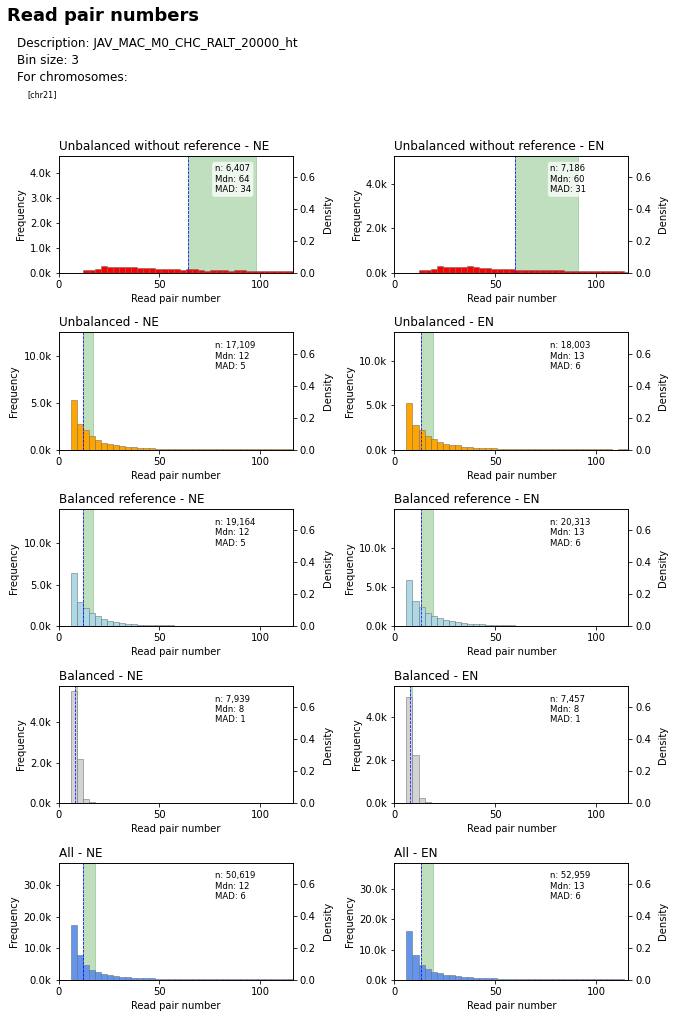

In [7]:
i_cats = ['DIX', 'DI', 'UIR', 'UI', 'ALL']
#e_cats = ['NN', 'NN']
#q_lim = 0.75
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_histograms(
    num_dict = rp_num_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_rp_num_histograms_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

### Interaction distances

1
2
3
4
4, i=0
4, j=0
4, j=1
4, i=1
4, j=0
4, j=1
4, i=2
4, j=0
4, j=1
4, i=3
4, j=0
4, j=1
4, i=4
4, j=0
4, j=1
5
6
7


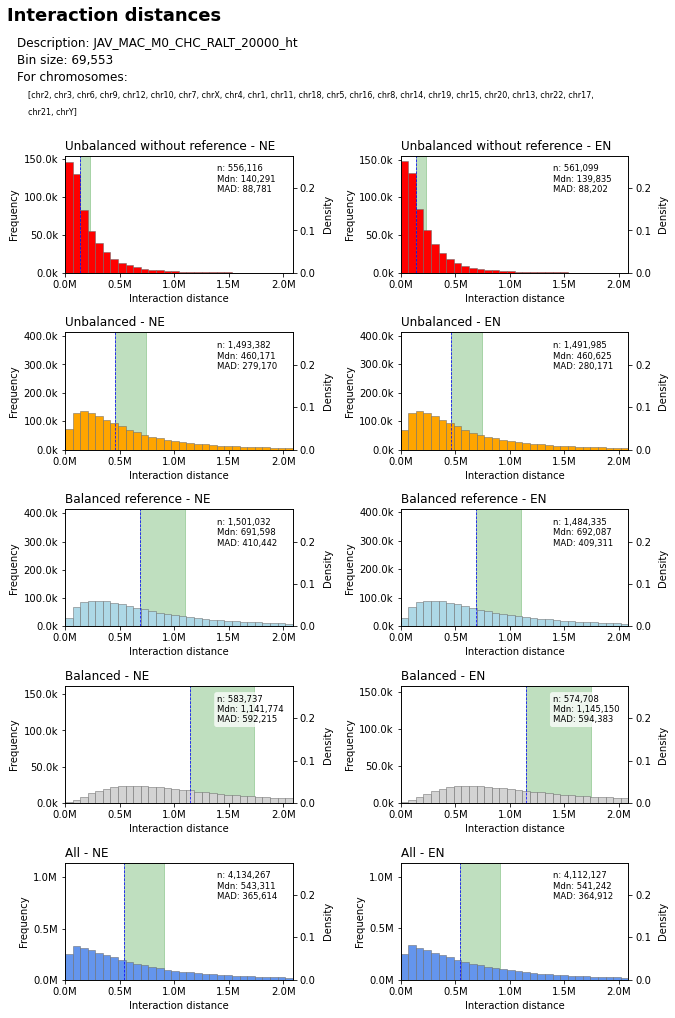

In [9]:
i_cats = ['DIX', 'DI', 'UIR', 'UI', 'ALL']
#e_cats = ['NN', 'NN']
#q_lim = 0.75
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_histograms(
    num_dict = i_dist_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_i_dist_histograms_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

### Explanation of the plot

In the grid, the x-axes of all histograms are comparable, with at least `q_lim=0.75` of the data shown in each plot. Each histogram has two y-axes. The left axis shows the absolute frequencies and the right axis shows the relative frequencies or densities. Also the y-axes of all histograms in the grid are comparable in terms of density. Each histogram contains three text fields, one for the number of interactions (n), one for the median (Mdn.) and one for the median absolute deviation (MAD). In addition, a blue dashed line is drawn at the median and the width of the  range highlighted in green corresponds to the MAD.

## Density difference plots for unbalanced and balanced reference interactions

To examine pairs of interaction and ennrichment categories more closely, the density difference plot can be used. For this plot, exactly two interaction and enrichment categories must be specified.

1
2
3
4
4: i=0
4: i=0, j=0
4: i=0, j=1
4: i=1
4: i=1, j=0
4: i=1, j=1
5
6
7
8
9
['DI', 'UIR']
['NE', 'EN']
RanksumsResult(statistic=-343.2341589965759, pvalue=0.0)
RanksumsResult(statistic=-344.7231603618765, pvalue=0.0)
RanksumsResult(statistic=0.07287034300066311, pvalue=0.9419092940390092)
RanksumsResult(statistic=-1.6771216480585815, pvalue=0.0935186963918378)
10
11
12
13
14


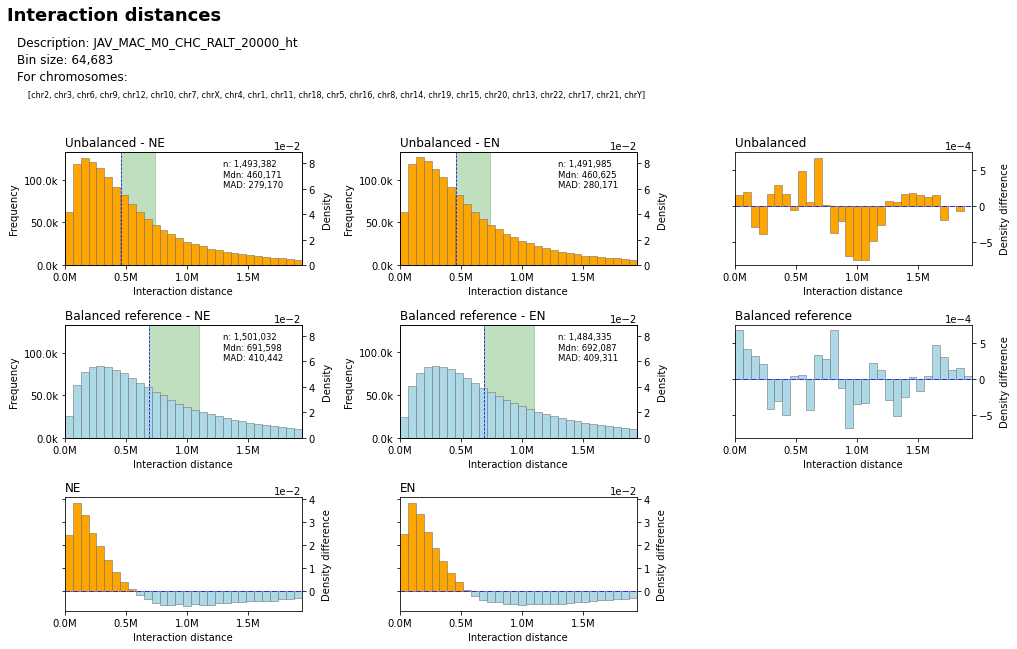

In [21]:
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_denisty_diff_plot(
    num_dict = i_dist_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_interaction_distance_dd_plot_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

### Explanation of the plot

The fields at the top left show the histograms that we already know from the previous plots. The upper limit for the x-axes is chosen so that each histogram shows at least `q_lim=0.75` of the data and the y-axes are again normalized to the maximum density in the four histograms. The density difference plot is to be read line by line and column by column. For instance, the bar plot at the bottom of the first column shows the differences in densities in the bins of the two histograms above. The difference of densities is shown on the left axis in scientific format. In the density difference plots below the histograms, the two interaction categories are compared within the same ennrichment category and, in the dennsity difference plots to the right of the histograms, two enrichment states are compared within the same interaction category.

### Total read pair counts per interaction

1
2
3
4
4: i=0
4: i=0, j=0
4: i=0, j=1
4: i=1
4: i=1, j=0
4: i=1, j=1
5
6
7
8
9
['DI', 'UIR']
['NE', 'EN']
RanksumsResult(statistic=-1.3685068742033057, pvalue=0.1711534717513148)
RanksumsResult(statistic=1.3569994950864377, pvalue=0.17478137094825352)
RanksumsResult(statistic=-3.8798337534221314, pvalue=0.00010452788341884399)
RanksumsResult(statistic=-1.1542922665885034, pvalue=0.2483803659705448)
10
11
12
13
14


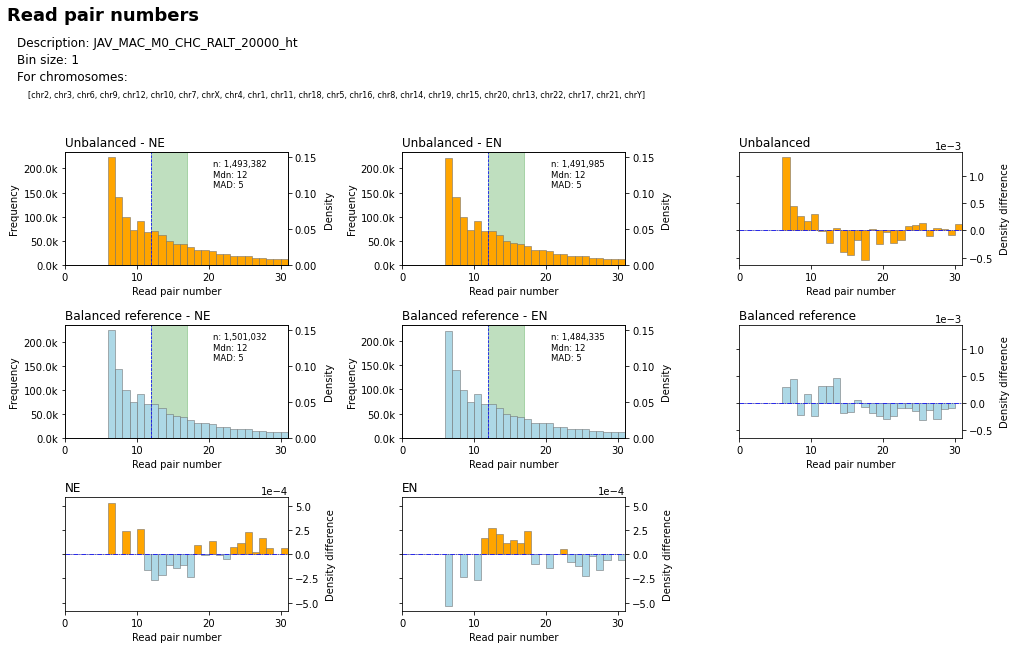

In [22]:
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_denisty_diff_plot(
    num_dict = rp_num_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_total_read_pair_counts_dd_plot_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

## Normalized selection of reference interactions

There is a strong dependency between interaction distance and frequency. Interaction frequency is reflected by the number of supporting read pairs per interaction. So far, for each unbalanced interaction, we have chosen a balanced reference interaction that has the same number of read pairs. For this selection procedure, we observed smaller distances for the unbalanced interactions than for the balanced reference interactions.

The results of the analysis of baited digests indicate that the interaction frequencies, measured by the total number of read pairs, is systematically underestimated for unbalanced interactions. To make unbalanced und balanced interactions more comparable in terms of read pair counts, we want to normalize the counts of interactions. For this purpose, we tried two methods:

1. For each interaction, take the maximum of the four four counts for the different read pair types.
2. For each interaction, take the maximum of the two counts for the read pair types `2` and `3`. The idea here is that type `3` is only associated with BDC1 digests and type `2` only with BDC2 digests.

If the normalization works well, then the distributions of distances for unbalanced and balanced reference interactions should become more similar.

### First normalization method: Maximum read pair counts (`RPMAX`)

For each unbalanced interaction, we try to select a balanced reference interaction that an identical maximum read pair count.

In [11]:
# Select new reference interactions
d11_interaction_set.deselect_reference_interactions()
d11_interaction_set.select_reference_interactions(selection_rule='RPMAX')

# Pass the DiachromaticInteractionSet to IaFreqDistAnalysis
ia_freq_dist_analysis_n1 = IaFreqDistAnalysis()
report_dict = ia_freq_dist_analysis_n1.ingest_interaction_set(
    d11_inter_set = d11_interaction_set,
    verbose = True)

print(ia_freq_dist_analysis_n1.get_ingest_interaction_set_info_report())

[INFO] Reading interactions and group them according to chromosomes, interaction and enrichment category ...
	[INFO] Read 1,000,000 interactions ...
	[INFO] Read 2,000,000 interactions ...
	[INFO] Read 3,000,000 interactions ...
	[INFO] Read 4,000,000 interactions ...
	[INFO] Read 5,000,000 interactions ...
	[INFO] Read 6,000,000 interactions ...
	[INFO] Read 7,000,000 interactions ...
	[INFO] Read 8,000,000 interactions ...
	[INFO] Read 9,000,000 interactions ...
	[INFO] Total number of interactions read: 9,648,210
[INFO] ... done.
[INFO] Report on ingestion of interactions:
	[INFO] Total number of interactions read: 9,648,210
	[INFO] Broken down by interaction category and enrichment status: 
		[INFO] DIX: 
			[INFO] NN: 46,970
			[INFO] EE: 73,515
			[INFO] NE: 894,604
			[INFO] EN: 899,699
		[INFO] DI: 
			[INFO] NN: 183,372
			[INFO] EE: 80,995
			[INFO] NE: 1,154,894
			[INFO] EN: 1,153,385
		[INFO] UIR: 
			[INFO] NN: 183,372
			[INFO] EE: 80,995
			[INFO] NE: 1,159,912
			[INFO

In [12]:
# Collect read pair and interaction numbers
n1_rp_num_dict, n1_i_dist_dict = ia_freq_dist_analysis_n1.get_all_rp_nums_and_i_dists(
    #chromosomes=['chr21'],
    verbose = True
)

[INFO] Getting all read pair numbers and interaction distances ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr21 ...
	[INFO] Processing chro

1
2
3
4
4: i=0
4: i=0, j=0
4: i=0, j=1
4: i=1
4: i=1, j=0
4: i=1, j=1
5
6
7
8
9
['DI', 'UIR']
['NE', 'EN']
RanksumsResult(statistic=-40.166385034550956, pvalue=0.0)
RanksumsResult(statistic=-43.65813235202035, pvalue=0.0)
RanksumsResult(statistic=1.065275115819954, pvalue=0.2867514501579137)
RanksumsResult(statistic=-2.4572630804971576, pvalue=0.014000012070544724)
10
11
12
13
14


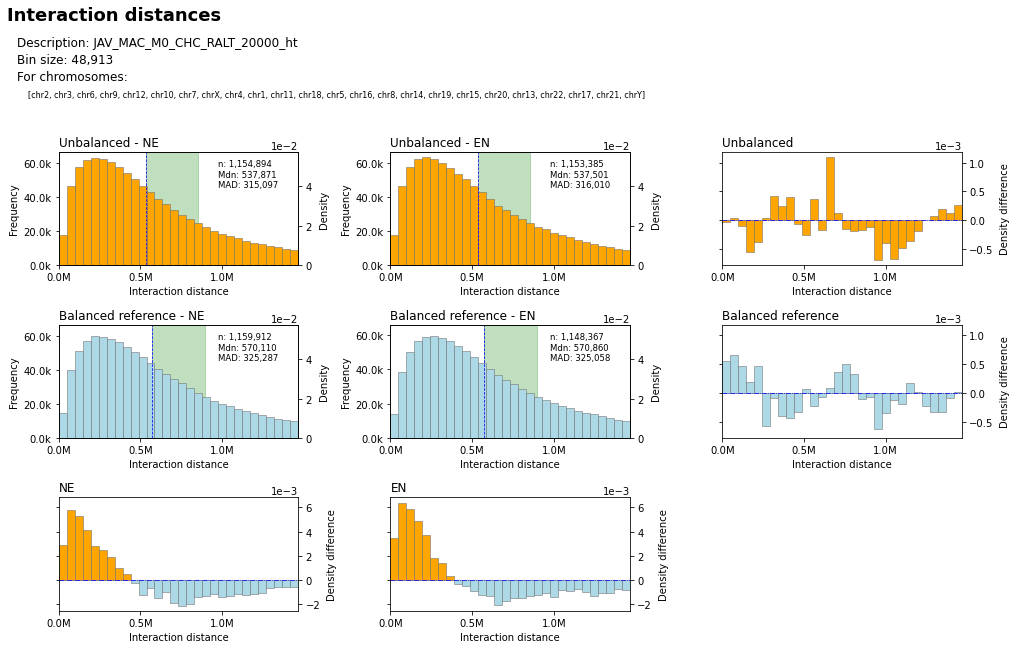

In [23]:
# Create density difference plot for DI and UIR
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis_n1.get_all_rp_nums_or_i_dists_denisty_diff_plot(
    num_dict = n1_i_dist_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_interaction_distance_dd_plot_n1_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

### Total read pair counts per interaction

1
2
3
4
4: i=0
4: i=0, j=0
4: i=0, j=1
4: i=1
4: i=1, j=0
4: i=1, j=1
5
6
7
8
9
['DI', 'UIR']
['NE', 'EN']
RanksumsResult(statistic=-434.6810411519268, pvalue=0.0)
RanksumsResult(statistic=-429.5174550468534, pvalue=0.0)
RanksumsResult(statistic=-4.63672672808267, pvalue=3.539698891540942e-06)
RanksumsResult(statistic=-0.364145510583505, pvalue=0.7157493538094291)
10
11
12
13
14


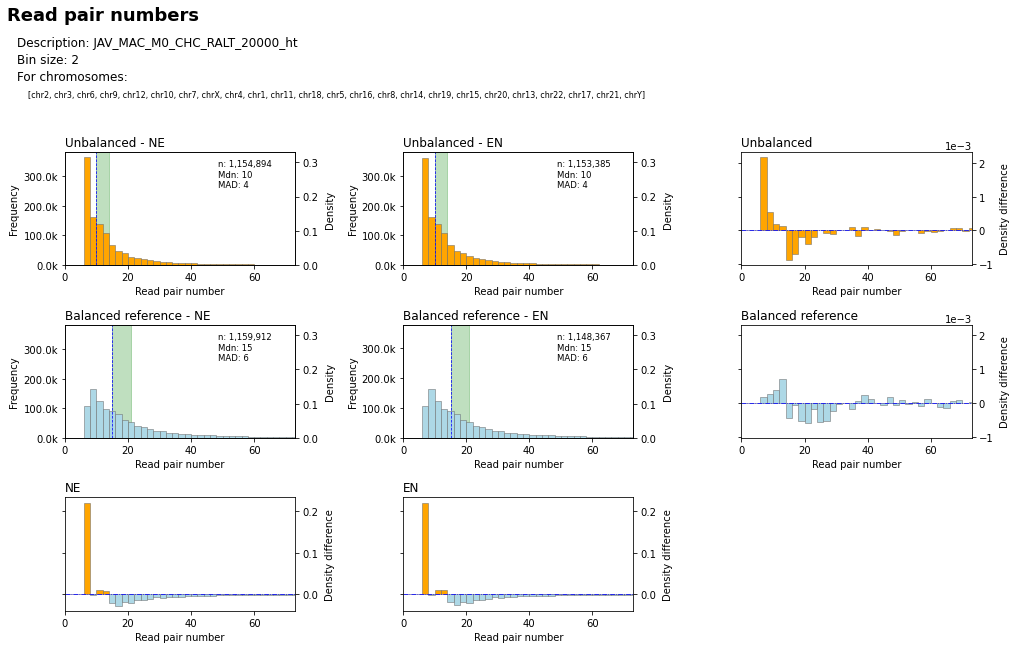

In [24]:
# Create density difference plot for DI and UIR
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.95
fig = ia_freq_dist_analysis_n1.get_all_rp_nums_or_i_dists_denisty_diff_plot(
    num_dict = n1_rp_num_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_total_read_pair_counts_dd_plot_n1_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

### Second normalization method: Maximum read pair counts of types `2` and `3` (`RPMAX2`)

For each unbalanced interaction, we try to select a balanced reference interaction that an identical maximum read pair count of types `2` and `3`.

In [13]:
# Select new reference interactions
d11_interaction_set.deselect_reference_interactions()
d11_interaction_set.select_reference_interactions(selection_rule='RPMAX2')

# Pass the DiachromaticInteractionSet to IaFreqDistAnalysis
ia_freq_dist_analysis_n2 = IaFreqDistAnalysis()
report_dict = ia_freq_dist_analysis_n2.ingest_interaction_set(
    d11_inter_set = d11_interaction_set,
    verbose = True)

print(ia_freq_dist_analysis_n2.get_ingest_interaction_set_info_report())

[INFO] Reading interactions and group them according to chromosomes, interaction and enrichment category ...
	[INFO] Read 1,000,000 interactions ...
	[INFO] Read 2,000,000 interactions ...
	[INFO] Read 3,000,000 interactions ...
	[INFO] Read 4,000,000 interactions ...
	[INFO] Read 5,000,000 interactions ...
	[INFO] Read 6,000,000 interactions ...
	[INFO] Read 7,000,000 interactions ...
	[INFO] Read 8,000,000 interactions ...
	[INFO] Read 9,000,000 interactions ...
	[INFO] Total number of interactions read: 9,648,210
[INFO] ... done.
[INFO] Report on ingestion of interactions:
	[INFO] Total number of interactions read: 9,648,210
	[INFO] Broken down by interaction category and enrichment status: 
		[INFO] DIX: 
			[INFO] NN: 44,200
			[INFO] EE: 67,728
			[INFO] NE: 800,742
			[INFO] EN: 804,633
		[INFO] DI: 
			[INFO] NN: 186,142
			[INFO] EE: 86,782
			[INFO] NE: 1,248,756
			[INFO] EN: 1,248,451
		[INFO] UIR: 
			[INFO] NN: 186,142
			[INFO] EE: 86,782
			[INFO] NE: 1,254,955
			[INFO

In [14]:
# Collect read pair and interaction numbers
n2_rp_num_dict, n2_i_dist_dict = ia_freq_dist_analysis_n2.get_all_rp_nums_and_i_dists(
    #chromosomes=['chr21'],
    verbose = True
)

[INFO] Getting all read pair numbers and interaction distances ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr21 ...
	[INFO] Processing chro

1
2
3
4
4: i=0
4: i=0, j=0
4: i=0, j=1
4: i=1
4: i=1, j=0
4: i=1, j=1
5
6
7
8
9
['DI', 'UIR']
['NE', 'EN']
RanksumsResult(statistic=-187.467812907648, pvalue=0.0)
RanksumsResult(statistic=-190.34579180563784, pvalue=0.0)
RanksumsResult(statistic=0.8018521016243241, pvalue=0.4226385159748799)
RanksumsResult(statistic=-2.1407991182158117, pvalue=0.03229024111519377)
10
11
12
13
14


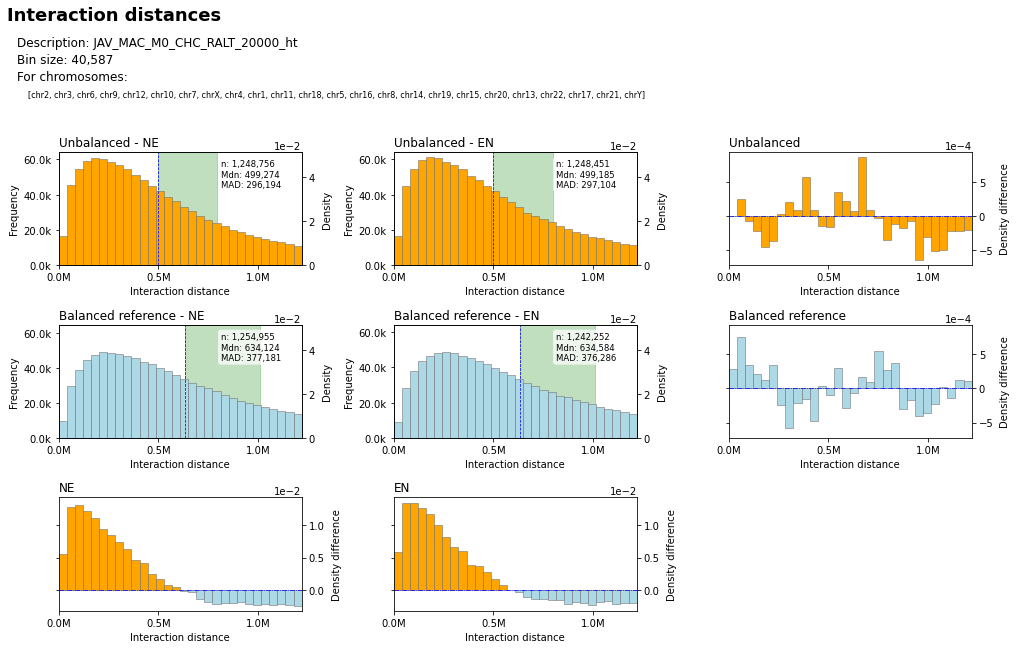

In [15]:
# Create density difference plot for DI and UIR
i_cats = ['DI', 'UIR']
#e_cats = ['NN', 'NN']
#q_lim = 0.75
fig = ia_freq_dist_analysis_n2.get_all_rp_nums_or_i_dists_denisty_diff_plot(
    num_dict = n2_i_dist_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_interaction_distance_dd_plot_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

## Writing out the results in one table row

So far, we have shown the results for a single cell type only. The function `ia_freq_dist_analysis.write_num_table()` can be used to export all values that are shown in the top right of the histograms to two tab separated files, one file for read pair numbers and one file for interaction distances.

We have five interaction and four enrichment categories and, for each pair, we have three values (n, Mdn. and MAD), which makes a total of 60 values. The first column contains a more detailed description of the row (`DESCRIPTION`) and the second column a short description (`DESCRIPTION_SHORT`), e.g. for the cell type, that is intended to be shown in the plots. This is followed by the 60 columns with values and a last column for the chromosomes that were taken into account for the respective row (`CHROMS`). This results in 75 columns.



```
DESCRIPTION   ...                           # MA_M1_RP_NUM_CHR21 or MA_M1_RP_NUM_CHR_ALL

DESCRIPTION_SHORT   ...                     # MA_M1

DI_NN_N   DI_NN_MED   DI_NN_MAD   ...
DI_NE_N   DI_NE_MED   DI_NE_MAD   ...
DI_EN_N   DI_EN_MED   DI_EN_MAD   ...
DI_EE_N   DI_EE_MED   DI_EE_MAD   ...

...

UI_EN_N   UI_EN_MED   UI_EN_MAD   ...
UI_EE_N   UI_EE_MED   UI_EE_MAD   ...

ALL_NN_N   ALL_NN_MED   ALL_NN_MAD   ...
ALL_NE_N   ALL_NE_MED   ALL_NE_MAD   ...
ALL_EN_N   ALL_EN_MED   ALL_EN_MAD   ...
ALL_EE_N   ALL_EE_MED   ALL_EE_MAD   ...

CHROMS                                       # ['chr21'] or ['chr21','chr22']

```

In [3]:
ia_freq_dist_analysis.write_num_table(
    out_prefix = 'd_inter/' + OUT_PREFIX,
    description = OUT_PREFIX,
    verbose = True)

[INFO] Writing results about read pair numbers and interaction distances to tab separated files ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr21 ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome

# Heatmaps

In [41]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
def create_heatmap(title, matrix, i_cats, e_cats):
    fig, ax = plt.subplots()
    im = ax.imshow(matrix)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(i_cats)))
    ax.set_yticks(np.arange(len(e_cats)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(i_cats)
    ax.set_yticklabels(e_cats)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(e_cats)):
        for j in range(len(i_cats)):
            text = ax.text(j, i, matrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title(title, loc='left')
    fig.tight_layout()
    plt.show()

## Percentages of interactions

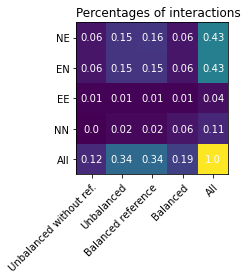

In [46]:
title = 'Percentages of interactions'
matrix = np.array([
    [0.06, 0.15, 0.16, 0.06, 0.43],
    [0.06, 0.15, 0.15, 0.06, 0.43],
    [0.01, 0.01, 0.01, 0.01, 0.04],
    [0.00, 0.02, 0.02, 0.06, 0.11],
    [0.12, 0.34, 0.34, 0.19, 1.00]])
i_cats = ["Unbalanced without ref.", "Unbalanced", "Balanced reference", "Balanced", "All"]
e_cats = ["NE", "EN", "EE", "NN", "All"]
create_heatmap(title=title, matrix=matrix, i_cats=i_cats, e_cats=e_cats)

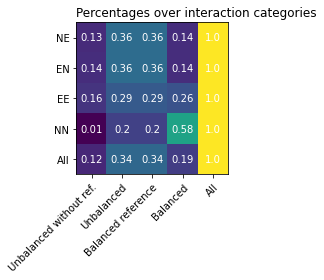

In [44]:
title = 'Percentages over interaction categories'
matrix = np.array([
    [0.13, 0.36, 0.36, 0.14, 1.00],
    [0.14, 0.36, 0.36, 0.14, 1.00],
    [0.16, 0.29, 0.29, 0.26, 1.00],
    [0.01, 0.20, 0.20, 0.58, 1.00],
    [0.12, 0.34, 0.34, 0.19, 1.00]])
i_cats = ["Unbalanced without ref.", "Unbalanced", "Balanced reference", "Balanced", "All"]
e_cats = ["NE", "EN", "EE", "NN", "All"]
create_heatmap(title=title, matrix=matrix, i_cats=i_cats, e_cats=e_cats)

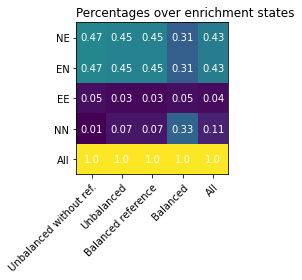

In [45]:
title = 'Percentages over enrichment states'
matrix = np.array([
    [0.47, 0.45, 0.45, 0.31, 0.43],
    [0.47, 0.45, 0.45, 0.31, 0.43],
    [0.05, 0.03, 0.03, 0.05, 0.04],
    [0.01, 0.07, 0.07, 0.33, 0.11],
    [1.00, 1.00, 1.00, 1.00, 1.00]])
i_cats = ["Unbalanced without ref.", "Unbalanced", "Balanced reference", "Balanced", "All"]
e_cats = ["NE", "EN", "EE", "NN", "All"]
create_heatmap(title=title, matrix=matrix, i_cats=i_cats, e_cats=e_cats)

## Median read pair numbers per interaction

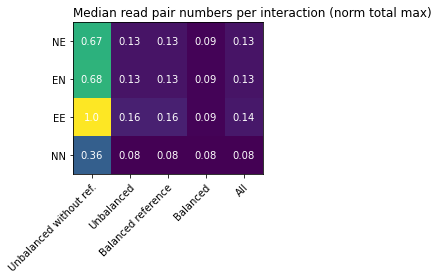

In [54]:
title = 'Median read pair numbers per interaction (norm total max)'
matrix = np.array([
    [0.67, 0.13, 0.13, 0.09, 0.13],
    [0.68, 0.13, 0.13, 0.09, 0.13],
    [1.00, 0.16, 0.16, 0.09, 0.14],
    [0.36, 0.08, 0.08, 0.08, 0.08]])
i_cats = ["Unbalanced without ref.", "Unbalanced", "Balanced reference", "Balanced", "All"]
e_cats = ["NE", "EN", "EE", "NN"]
create_heatmap(title=title, matrix=matrix, i_cats=i_cats, e_cats=e_cats)

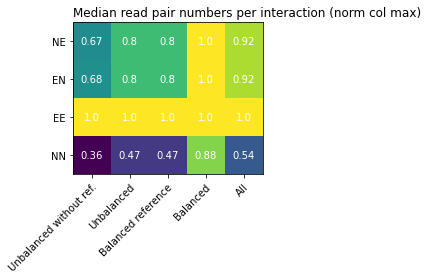

In [56]:
title = 'Median read pair numbers per interaction (norm col max)'
matrix = np.array([
    [0.67, 0.80, 0.80, 1.00, 0.92],
    [0.68, 0.80, 0.80, 1.00, 0.92],
    [1.00, 1.00, 1.00, 1.00, 1.00],
    [0.36, 0.47, 0.47, 0.88, 0.54]])
i_cats = ["Unbalanced without ref.", "Unbalanced", "Balanced reference", "Balanced", "All"]
e_cats = ["NE", "EN", "EE", "NN"]
create_heatmap(title=title, matrix=matrix, i_cats=i_cats, e_cats=e_cats)

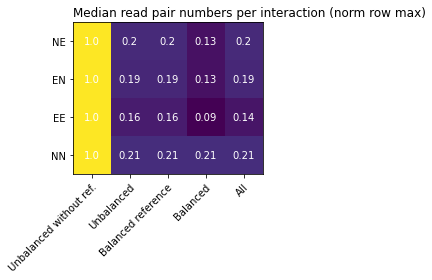

In [57]:
title = 'Median read pair numbers per interaction (norm row max)'
matrix = np.array([
    [1.00, 0.20, 0.20, 0.13, 0.20],
    [1.00, 0.19, 0.19, 0.13, 0.19],
    [1.00, 0.16, 0.16, 0.09, 0.14],
    [1.00, 0.21, 0.21, 0.21, 0.21]])
i_cats = ["Unbalanced without ref.", "Unbalanced", "Balanced reference", "Balanced", "All"]
e_cats = ["NE", "EN", "EE", "NN"]
create_heatmap(title=title, matrix=matrix, i_cats=i_cats, e_cats=e_cats)

## Interaction distances

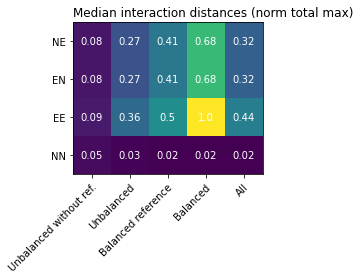

In [49]:
title = 'Median interaction distances (norm total max)'
matrix = np.array([
    [0.08, 0.27, 0.41, 0.68, 0.32],
    [0.08, 0.27, 0.41, 0.68, 0.32],
    [0.09, 0.36, 0.50, 1.00, 0.44],
    [0.05, 0.03, 0.02, 0.02, 0.02]])
i_cats = ["Unbalanced without ref.", "Unbalanced", "Balanced reference", "Balanced", "All"]
e_cats = ["NE", "EN", "EE", "NN"]
create_heatmap(title=title, matrix=matrix, i_cats=i_cats, e_cats=e_cats)

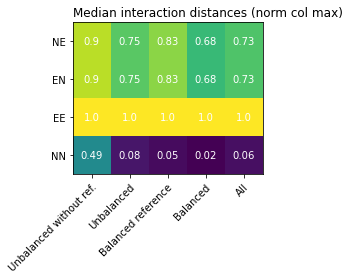

In [52]:
title = 'Median interaction distances (norm col max)'
matrix = np.array([
    [0.90, 0.75, 0.83, 0.68, 0.73],
    [0.90, 0.75, 0.83, 0.68, 0.73],
    [1.00, 1.00, 1.00, 1.00, 1.00],
    [0.49, 0.08, 0.05, 0.02, 0.06]])
i_cats = ["Unbalanced without ref.", "Unbalanced", "Balanced reference", "Balanced", "All"]
e_cats = ["NE", "EN", "EE", "NN"]
create_heatmap(title=title, matrix=matrix, i_cats=i_cats, e_cats=e_cats)

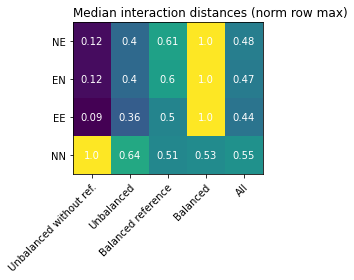

In [53]:
title = 'Median interaction distances (norm row max)'
matrix = np.array([
    [0.12, 0.40, 0.61, 1.00, 0.48],
    [0.12, 0.40, 0.60, 1.00, 0.47],
    [0.09, 0.36, 0.50, 1.00, 0.44],
    [1.00, 0.64, 0.51, 0.53, 0.55]])
i_cats = ["Unbalanced without ref.", "Unbalanced", "Balanced reference", "Balanced", "All"]
e_cats = ["NE", "EN", "EE", "NN"]
create_heatmap(title=title, matrix=matrix, i_cats=i_cats, e_cats=e_cats)

## Distance read pair count correlation

In [3]:
print(ia_freq_dist_analysis.get_ingest_interaction_set_info_report())

[INFO] Report on ingestion of interactions:
	[INFO] Total number of interactions read: 8,904,247
	[INFO] Broken down by interaction category and enrichment status: 
		[INFO] DIX: 
			[INFO] NN: 24,966
			[INFO] EE: 58,441
			[INFO] NE: 528,362
			[INFO] EN: 537,294
		[INFO] DI: 
			[INFO] NN: 62,577
			[INFO] EE: 130,596
			[INFO] NE: 1,550,920
			[INFO] EN: 1,561,413
		[INFO] UIR: 
			[INFO] NN: 62,577
			[INFO] EE: 130,596
			[INFO] NE: 1,557,238
			[INFO] EN: 1,555,095
		[INFO] UI: 
			[INFO] NN: 46,909
			[INFO] EE: 102,680
			[INFO] NE: 498,152
			[INFO] EN: 496,431
		[INFO] ALL: 
			[INFO] NN: 197,029
			[INFO] EE: 422,313
			[INFO] NE: 4,134,672
			[INFO] EN: 4,150,233
[INFO] End of report.



In [4]:
interaction_list=d11_interaction_set.interaction_list

In [33]:
lists_dict = {
    'DIX':{
        'RP':[],
        'ID':[]
    },
    'DI':{
        'RP':[],
        'ID':[]
    },
    'UIR':{
        'RP':[],
        'ID':[]
    },
    'UI':{
        'RP':[],
        'ID':[]
    },
    'ALL':{
        'RP':[],
        'ID':[]
    }  
}

rp_list = []
i_dist_list = []
for d11_inter in interaction_list:
    lists_dict[d11_inter.get_category()]['RP'].append(d11_inter.rp_total)
    lists_dict[d11_inter.get_category()]['ID'].append(d11_inter.i_dist)
    lists_dict['ALL']['RP'].append(d11_inter.rp_total)
    lists_dict['ALL']['ID'].append(d11_inter.i_dist)

In [34]:
import numpy as np
for i_cat in ['DIX', 'DI', 'UIR', 'UI', 'ALL']:
    print(i_cat + ': ' + str(np.corrcoef(lists_dict[i_cat]['RP'], lists_dict[i_cat]['ID'])[0][1]))

DIX: -0.10543710741364537
DI: -0.08690909844169702
UIR: -0.10702293632734791
UI: -0.06352626051185173
ALL: -0.09366318569857668


In [35]:
import numpy as np
import scipy.stats
print('pearsonr')
for i_cat in ['DIX', 'DI', 'UIR', 'UI', 'ALL']:
    rp_arr = np.asarray(lists_dict[i_cat]['RP'])
    id_arr = np.asarray(lists_dict[i_cat]['ID'])
    print(i_cat + ': ' + str(scipy.stats.pearsonr(rp_arr, id_arr)))
print('spearmanr')
for i_cat in ['DIX', 'DI', 'UIR', 'UI', 'ALL']:
    rp_arr = np.asarray(lists_dict[i_cat]['RP'])
    id_arr = np.asarray(lists_dict[i_cat]['ID'])
    print(i_cat + ': ' + str(scipy.stats.spearmanr(rp_arr, id_arr)))
print('kendalltau')
for i_cat in ['DIX', 'DI', 'UIR', 'UI', 'ALL']:
    rp_arr = np.asarray(lists_dict[i_cat]['RP'])
    id_arr = np.asarray(lists_dict[i_cat]['ID'])
    print(i_cat + ': ' + str(scipy.stats.kendalltau(rp_arr, id_arr)))

pearsonr
DIX: (-0.10543710741364526, 0.0)
DI: (-0.08690909844169711, 0.0)
UIR: (-0.10702293632734827, 0.0)
UI: (-0.06352626051185187, 0.0)
ALL: (-0.0936631856985764, 0.0)
spearmanr
DIX: SpearmanrResult(correlation=-0.5472028610032951, pvalue=0.0)
DI: SpearmanrResult(correlation=-0.5047775026525007, pvalue=0.0)
UIR: SpearmanrResult(correlation=-0.5508287766903326, pvalue=0.0)
UI: SpearmanrResult(correlation=-0.20155056749366612, pvalue=0.0)
ALL: SpearmanrResult(correlation=-0.6008588347858167, pvalue=0.0)
kendalltau
DIX: KendalltauResult(correlation=-0.387161782527659, pvalue=0.0)
DI: KendalltauResult(correlation=-0.3660948611096869, pvalue=0.0)
UIR: KendalltauResult(correlation=-0.40614316632604314, pvalue=0.0)
UI: KendalltauResult(correlation=-0.15134334625186943, pvalue=0.0)
ALL: KendalltauResult(correlation=-0.4465789086107428, pvalue=0.0)


/Users/hansep/.conda/envs/diachrscripts/lib/python3.7/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


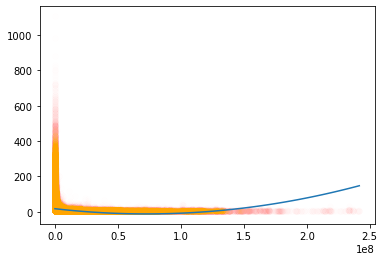

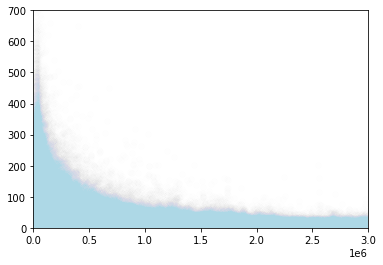

In [36]:
import matplotlib.pyplot as plt
xmax = 3000000
ymax = 700

x = np.asarray(lists_dict['DI']['ID'])
y = np.asarray(lists_dict['DI']['RP'])
plt.scatter(x, y, color='orange', alpha=0.005)
coefs = np.polyfit(x, y, 2)
ffit = np.poly1d(coefs)
x_new = np.linspace(0, max(x), num=100)
plt.plot(x_new, ffit(x_new))

#plt.xlim(0, xmax)
#plt.ylim(0, ymax)
plt.show()

x = np.asarray(lists_dict['UIR']['ID'])
y = np.asarray(lists_dict['UIR']['RP'])
plt.scatter(x, y, color='lightblue', alpha=0.005)
coefs = np.polyfit(x, y, 2)
ffit = np.poly1d(coefs)

plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()